In [1]:
#import libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

#1. create a dataframe

In [2]:
df = pd.DataFrame(columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        0 non-null      object
 1   Open        0 non-null      object
 2   High        0 non-null      object
 3   Low         0 non-null      object
 4   Close       0 non-null      object
 5   Volume      0 non-null      object
 6   Market Cap  0 non-null      object
dtypes: object(7)
memory usage: 124.0+ bytes


In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap


#2. Add data

In [5]:
dates = [datetime(2024, 3, 1) + timedelta(days=i) for i in range(61)]   # from 1st march 2024 to 30th april 2024 (2 months)
dates = [date.strftime('%d-%m-%Y') for date in dates]

In [6]:
open_price = np.random.uniform(35000, 50000, size=61) # random open price ranging from 35000 to 50000

high_price = np.random.uniform(open_price, 55000, size=61)  # random high price ranging from open price to 55000

close_price = np.roll(open_price, -1)  # close price is the next day's open price

low_price = np.random.uniform(32000, close_price, size=61)  # random low price ranging from 32000 to close price

volume = np.random.randint(1000000, 5000000, size=61) # random volume ranging from 1000000 to 5000000

market_cap = np.random.randint(100000000000, 200000000000, size=61) # random market cap ranging from 100000000000 to 200000000000

In [7]:
df['Date'] = dates
df['Open'] = open_price
df['High'] = high_price
df['Low'] = low_price
df['Close'] = close_price
df['Volume'] = volume
df['Market Cap'] = market_cap

In [8]:
# the last day's Close price to be between Open and High
df.iloc[-1, df.columns.get_loc('Close')] = np.random.uniform(df.iloc[-1, df.columns.get_loc('Open')], df.iloc[-1, df.columns.get_loc('High')])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        61 non-null     object 
 1   Open        61 non-null     float64
 2   High        61 non-null     float64
 3   Low         61 non-null     float64
 4   Close       61 non-null     float64
 5   Volume      61 non-null     int64  
 6   Market Cap  61 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 3.5+ KB


In [10]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,01-03-2024,46988.242743,46997.817217,47175.284783,47223.260789,2649960,168092764992
1,02-03-2024,47223.260789,54640.030705,35555.917686,36684.077329,3179860,134261271440
2,03-03-2024,36684.077329,37847.240324,34279.938761,42068.448777,3662171,131016173168
3,04-03-2024,42068.448777,44226.381510,32725.107356,35015.241522,1286919,175268701733
4,05-03-2024,35015.241522,45717.669040,38211.402565,38872.749135,2926295,193119690270


In [11]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
56,26-04-2024,35911.817041,54718.945437,32647.596613,38372.853154,4167360,156108741918
57,27-04-2024,38372.853154,43088.644986,39199.399558,44270.286895,3843565,145640401611
58,28-04-2024,44270.286895,48203.915001,39371.813712,40590.591894,3774746,179519148545
59,29-04-2024,40590.591894,41462.285660,32662.937561,45897.261202,2236871,106420140875
60,30-04-2024,45897.261202,53272.114566,39020.831926,51584.115434,1771304,181621936808


In [12]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [13]:
df.sort_values(by='Date', inplace=True)

In [14]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2024-03-01,46988.242743,46997.817217,47175.284783,47223.260789,2649960,168092764992
1,2024-03-02,47223.260789,54640.030705,35555.917686,36684.077329,3179860,134261271440
2,2024-03-03,36684.077329,37847.240324,34279.938761,42068.448777,3662171,131016173168
3,2024-03-04,42068.448777,44226.381510,32725.107356,35015.241522,1286919,175268701733
4,2024-03-05,35015.241522,45717.669040,38211.402565,38872.749135,2926295,193119690270


In [15]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
56,2024-04-26,35911.817041,54718.945437,32647.596613,38372.853154,4167360,156108741918
57,2024-04-27,38372.853154,43088.644986,39199.399558,44270.286895,3843565,145640401611
58,2024-04-28,44270.286895,48203.915001,39371.813712,40590.591894,3774746,179519148545
59,2024-04-29,40590.591894,41462.285660,32662.937561,45897.261202,2236871,106420140875
60,2024-04-30,45897.261202,53272.114566,39020.831926,51584.115434,1771304,181621936808


#3. EDA

In [16]:
df.describe()  # descriptive statistics

,Date,Open,High,Low,Close,Volume,Market Cap
count,61,61.000000,61.000000,61.000000,61.000000,6.100000e+01,6.100000e+01
mean,2024-03-31 00:00:00,42182.468621,48265.428367,36425.818795,42257.810796,3.032144e+06,1.514786e+11
min,2024-03-01 00:00:00,35015.241522,36671.221446,32066.763306,35015.241522,1.060362e+06,1.000651e+11
25%,2024-03-16 00:00:00,38257.597252,45717.669040,33480.952080,38257.597252,2.183111e+06,1.310162e+11
50%,2024-03-31 00:00:00,42416.910111,49419.885059,35366.737590,42416.910111,2.926295e+06,1.489095e+11
75%,2024-04-15 00:00:00,45897.261202,51521.585672,38306.617686,45897.261202,4.097514e+06,1.758194e+11
max,2024-04-30 00:00:00,49787.514967,54718.945437,47175.284783,51584.115434,4.923186e+06,1.977146e+11
std,NaN,4578.113368,4817.110262,3789.467737,4694.849226,1.172025e+06,2.746413e+10


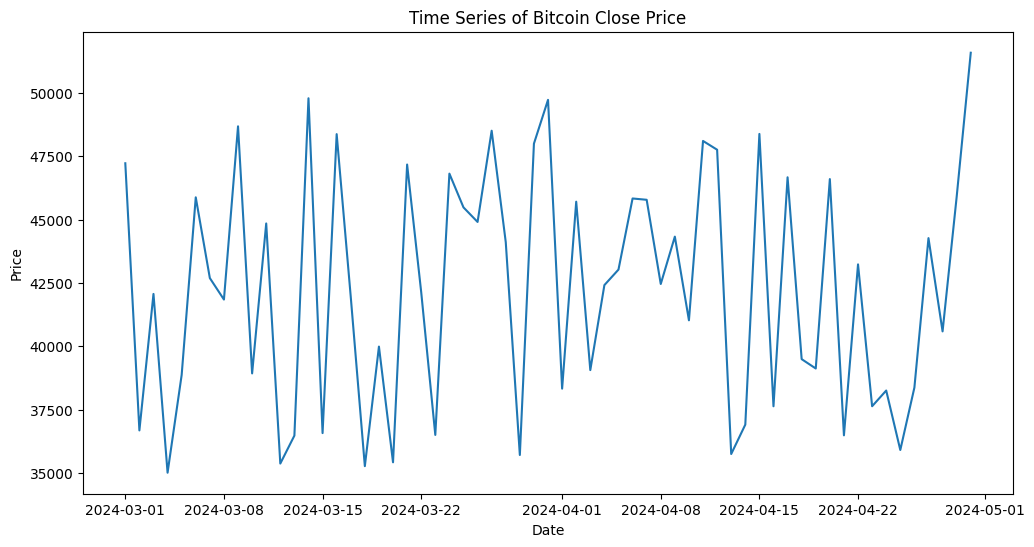

In [17]:
# plot a time series of the Close price of Bitcoin
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Time Series of Bitcoin Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

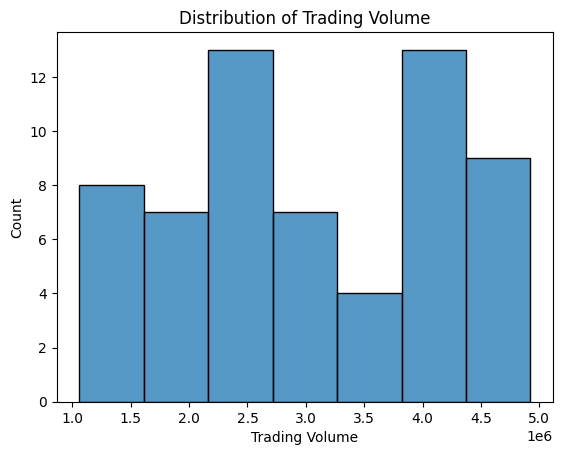

In [18]:
# plot the distribution of the Volume
sns.histplot(df['Volume'], kde=False)
plt.title('Distribution of Trading Volume')
plt.xlabel('Trading Volume')
plt.show()

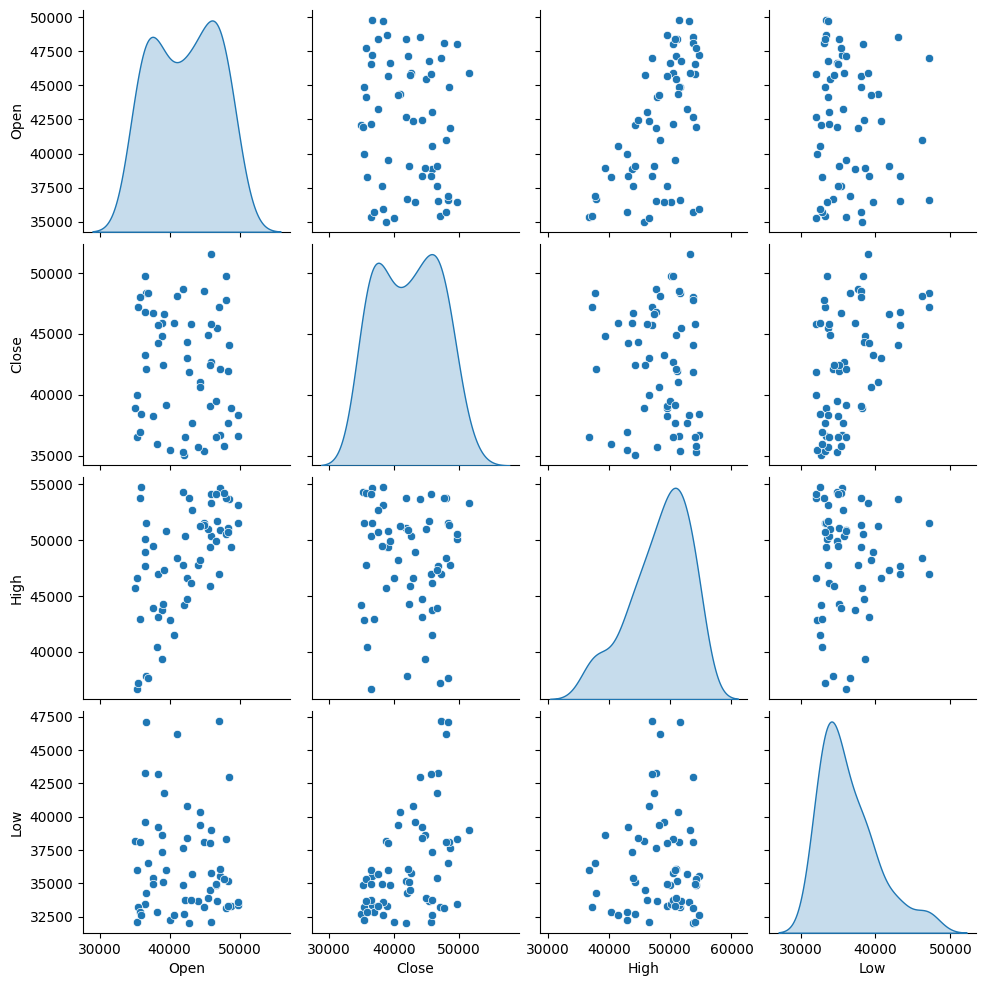

In [19]:
#a pair plot to show the relationship between Open, Close, High, and Low
sns.pairplot(df[['Open', 'Close', 'High', 'Low']], diag_kind='kde')
plt.show()

In [20]:
# correlation between Open, High, Low, Close, and Volume
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
print(correlation_matrix)

            Open      High       Low     Close    Volume
Open    1.000000  0.568960 -0.097886 -0.130437 -0.175548
High    0.568960  1.000000  0.018151 -0.075824 -0.085322
Low    -0.097886  0.018151  1.000000  0.470725 -0.061660
Close  -0.130437 -0.075824  0.470725  1.000000  0.061333
Volume -0.175548 -0.085322 -0.061660  0.061333  1.000000


#4. Applying filtering conditions

In [21]:
filtered_rows = df[(df['Close'] > df['Open'])]  # filter the rows where Close price is greater than the Open price

In [22]:
filtered_volume = df[(df['Volume'] > df['Volume'].mean())] # filter the rows where The trading volume was higher than the average trading volume

In [23]:
filtered_both=df[(df['Close'] > df['Open']) & (df['Volume'] > df['Volume'].mean())] # filter the rows for both conditions

In [24]:
filtered_rows

,Date,Open,High,Low,Close,Volume,Market Cap
0,2024-03-01,46988.242743,46997.817217,47175.284783,47223.260789,2649960,168092764992
2,2024-03-03,36684.077329,37847.240324,34279.938761,42068.448777,3662171,131016173168
4,2024-03-05,35015.241522,45717.669040,38211.402565,38872.749135,2926295,193119690270
5,2024-03-06,38872.749135,43707.014009,37323.238019,45879.417145,2253057,169376050264
8,2024-03-09,41846.840126,47745.540010,37666.367312,48680.834980,2352781,133505786066
10,2024-03-11,38932.945687,39327.200625,38621.726937,44848.591057,4030917,148909454710
12,2024-03-13,35376.427479,36671.221446,36007.707354,36479.276139,2338838,139379336824
13,2024-03-14,36479.276139,50100.905916,33480.952080,49787.514967,4797256,175819392951
15,2024-03-16,36578.143437,51521.585672,47126.776596,48372.783503,4410364,183742524352
18,2024-03-19,35274.027087,46581.546565,32086.800990,39991.093187,4923186,121075278634


In [25]:
filtered_volume

,Date,Open,High,Low,Close,Volume,Market Cap
1,2024-03-02,47223.260789,54640.030705,35555.917686,36684.077329,3179860,134261271440
2,2024-03-03,36684.077329,37847.240324,34279.938761,42068.448777,3662171,131016173168
6,2024-03-07,45879.417145,50370.670865,35800.750529,42693.488686,4097514,153261876415
9,2024-03-10,48680.834980,49410.788984,33342.788320,38932.945687,3359966,166975082004
10,2024-03-11,38932.945687,39327.200625,38621.726937,44848.591057,4030917,148909454710
11,2024-03-12,44848.591057,51533.725599,33202.164564,35376.427479,4163256,149859208534
13,2024-03-14,36479.276139,50100.905916,33480.952080,49787.514967,4797256,175819392951
14,2024-03-15,49787.514967,51483.394173,33395.507841,36578.143437,4807278,140564970653
15,2024-03-16,36578.143437,51521.585672,47126.776596,48372.783503,4410364,183742524352
17,2024-03-18,41951.780788,54258.128943,34861.044519,35274.027087,3981827,101110386806


In [26]:
filtered_both

,Date,Open,High,Low,Close,Volume,Market Cap
2,2024-03-03,36684.077329,37847.240324,34279.938761,42068.448777,3662171,131016173168
10,2024-03-11,38932.945687,39327.200625,38621.726937,44848.591057,4030917,148909454710
13,2024-03-14,36479.276139,50100.905916,33480.952080,49787.514967,4797256,175819392951
15,2024-03-16,36578.143437,51521.585672,47126.776596,48372.783503,4410364,183742524352
18,2024-03-19,35274.027087,46581.546565,32086.800990,39991.093187,4923186,121075278634
20,2024-03-21,35426.031326,37234.570180,33236.102152,47173.678120,4148756,118984241222
26,2024-03-27,44907.841806,51358.271291,38081.779078,48506.970190,4230525,185631583812
32,2024-04-02,38331.986087,46962.709739,43214.346146,45707.732954,4095312,182828055737
34,2024-04-04,39064.076047,44250.998369,35126.393157,42416.910111,4308143,141706263209
35,2024-04-05,42416.910111,46568.035878,40781.721201,43029.037719,3944866,171625858432


#5. For Loop and Conditional Statements

In [27]:
df['Price Change'] = df['Close'] - df['Open']  # create Price Change column

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          61 non-null     datetime64[ns]
 1   Open          61 non-null     float64       
 2   High          61 non-null     float64       
 3   Low           61 non-null     float64       
 4   Close         61 non-null     float64       
 5   Volume        61 non-null     int64         
 6   Market Cap    61 non-null     int64         
 7   Price Change  61 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 3.9 KB


In [29]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Price Change
0,2024-03-01,46988.242743,46997.817217,47175.284783,47223.260789,2649960,168092764992,235.018046
1,2024-03-02,47223.260789,54640.030705,35555.917686,36684.077329,3179860,134261271440,-10539.183460
2,2024-03-03,36684.077329,37847.240324,34279.938761,42068.448777,3662171,131016173168,5384.371448
3,2024-03-04,42068.448777,44226.381510,32725.107356,35015.241522,1286919,175268701733,-7053.207256
4,2024-03-05,35015.241522,45717.669040,38211.402565,38872.749135,2926295,193119690270,3857.507614


In [30]:
for i in range(len(df)):                            # If the Close price is higher than the Open price, set the value to "Up." otherwise set the value to "Down" in Price trend column
    if df.loc[i, 'Close'] > df.loc[i, 'Open']:
        df.loc[i, 'Price Trend'] = 'Up'
    else:
        df.loc[i, 'Price Trend'] = 'Down'

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          61 non-null     datetime64[ns]
 1   Open          61 non-null     float64       
 2   High          61 non-null     float64       
 3   Low           61 non-null     float64       
 4   Close         61 non-null     float64       
 5   Volume        61 non-null     int64         
 6   Market Cap    61 non-null     int64         
 7   Price Change  61 non-null     float64       
 8   Price Trend   61 non-null     object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 4.4+ KB


In [32]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Price Change,Price Trend
0,2024-03-01,46988.242743,46997.817217,47175.284783,47223.260789,2649960,168092764992,235.018046,Up
1,2024-03-02,47223.260789,54640.030705,35555.917686,36684.077329,3179860,134261271440,-10539.183460,Down
2,2024-03-03,36684.077329,37847.240324,34279.938761,42068.448777,3662171,131016173168,5384.371448,Up
3,2024-03-04,42068.448777,44226.381510,32725.107356,35015.241522,1286919,175268701733,-7053.207256,Down
4,2024-03-05,35015.241522,45717.669040,38211.402565,38872.749135,2926295,193119690270,3857.507614,Up


In [33]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap,Price Change,Price Trend
56,2024-04-26,35911.817041,54718.945437,32647.596613,38372.853154,4167360,156108741918,2461.036113,Up
57,2024-04-27,38372.853154,43088.644986,39199.399558,44270.286895,3843565,145640401611,5897.433741,Up
58,2024-04-28,44270.286895,48203.915001,39371.813712,40590.591894,3774746,179519148545,-3679.695001,Down
59,2024-04-29,40590.591894,41462.285660,32662.937561,45897.261202,2236871,106420140875,5306.669308,Up
60,2024-04-30,45897.261202,53272.114566,39020.831926,51584.115434,1771304,181621936808,5686.854232,Up
